### Импорт библиотек

In [1]:
import numpy as np # работа с матрицами
import pandas as pd # работа с наборами данных
import matplotlib.pyplot as plt # построение графиков
import umap # алгоритм UMAP
import seaborn as sns # продвинутое построение графиков
from sklearn.preprocessing import StandardScaler # стандартизация данных
from scipy.spatial.distance import cdist # расчет расстояний между объектами из выборки

### Загрузка данных

In [2]:
data = pd.read_csv('data.csv', index_col = 'Unnamed: 0')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,659,660,661,662,663,664,665,666,667,668
2GIVE,0.000337,0.000330,0.000276,0.000380,0.000393,0.000263,0.000271,0.000382,0.000447,0.000343,...,3.049000e-03,3.035000e-03,3.027000e-03,3.045000e-03,3.069000e-03,3.150000e-03,3.165000e-03,3.074000e-03,2.899000e-03,2.822000e-03
808Coin,0.000183,0.000190,0.000163,0.000167,0.000185,0.000101,0.000090,0.000091,0.000091,0.000063,...,2.400000e-07,3.000000e-07,4.600000e-07,3.500000e-07,3.500000e-07,3.600000e-07,3.700000e-07,4.000000e-07,3.800000e-07,4.100000e-07
Advanced Technology Coin,0.000920,0.001045,0.001118,0.000802,0.001117,0.000822,0.001016,0.001438,0.001581,0.001226,...,1.295000e-02,1.310500e-02,1.275000e-02,1.243800e-02,1.225000e-02,1.295800e-02,1.297900e-02,1.754600e-02,1.289800e-02,1.352600e-02
Adzcoin,0.012510,0.013507,0.011208,0.013476,0.016513,0.016809,0.015463,0.016206,0.016058,0.015488,...,7.420000e-03,7.252000e-03,6.820000e-03,6.435000e-03,6.328000e-03,5.989000e-03,5.317000e-03,5.632000e-03,5.189000e-03,5.505000e-03
Aeon,0.096369,0.099892,0.122341,0.146345,0.172024,0.137121,0.161694,0.131631,0.130000,0.127101,...,5.532540e-01,5.934620e-01,6.086840e-01,6.110530e-01,6.103660e-01,6.203560e-01,6.258540e-01,5.909240e-01,5.403250e-01,5.223390e-01


### Сохранение названий криптовалют

In [3]:
names = pd.read_csv('data.csv')
names = names['Unnamed: 0'].values

### Стандартизация данных

In [4]:
scaler = StandardScaler()
new_data = pd.DataFrame(scaler.fit_transform(data.T).T)
new_data.index = names
new_data.head()

,0,1,2,3,4,5,6,7,8,9,...,659,660,661,662,663,664,665,666,667,668
2GIVE,-0.991188,-0.992456,-1.002233,-0.983403,-0.981049,-1.004587,-1.003139,-0.983040,-0.971271,-0.990102,...,-0.500140,-0.502675,-0.504123,-0.500864,-0.496518,-0.481852,-0.479136,-0.495613,-0.527299,-0.541241
808Coin,-0.269095,-0.254651,-0.310362,-0.302108,-0.264968,-0.438290,-0.460987,-0.458923,-0.458923,-0.516697,...,-0.646194,-0.646070,-0.645740,-0.645967,-0.645967,-0.645946,-0.645925,-0.645864,-0.645905,-0.645843
Advanced Technology Coin,-1.047549,-1.045152,-1.043751,-1.049813,-1.043770,-1.049429,-1.045708,-1.037613,-1.034869,-1.041679,...,-0.816774,-0.813801,-0.820611,-0.826596,-0.830202,-0.816621,-0.816218,-0.728607,-0.817772,-0.805724
Adzcoin,-0.873225,-0.826734,-0.933940,-0.828179,-0.686558,-0.672755,-0.735522,-0.700874,-0.707776,-0.734356,...,-1.110581,-1.118415,-1.138560,-1.156514,-1.161503,-1.177311,-1.208648,-1.193959,-1.214617,-1.199881
Aeon,-0.927224,-0.924801,-0.909357,-0.892843,-0.875176,-0.899189,-0.882283,-0.902965,-0.904087,-0.906082,...,-0.612904,-0.585242,-0.574770,-0.573140,-0.573613,-0.566740,-0.562958,-0.586988,-0.621799,-0.634172


### Списки с гиперпараметрами

In [5]:
mindists = [0.01, 0.1, 0.3, 0.6, 1.0]
neighs = [2, 3, 4, 5, 6, 7, 8, 9, 10, 50, 100]

### Снижение размерности с помощью UMAP и визуализация  

C:\Users\eliza\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 21 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


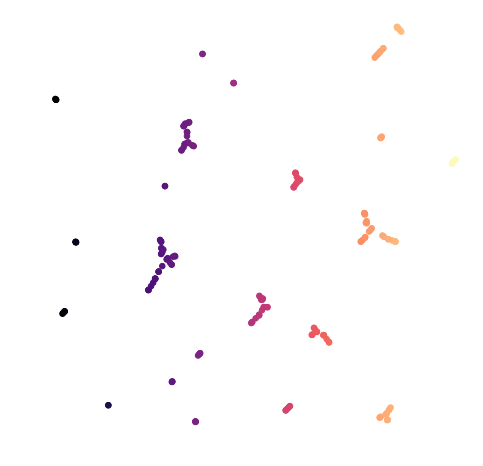

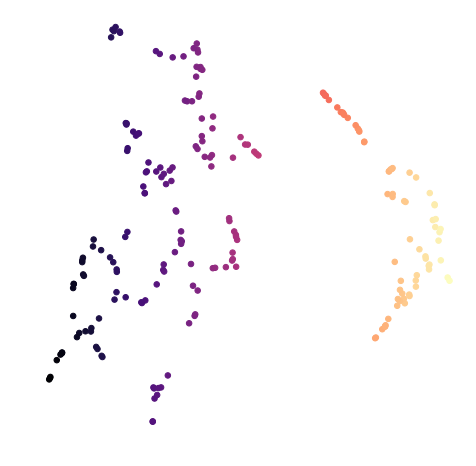

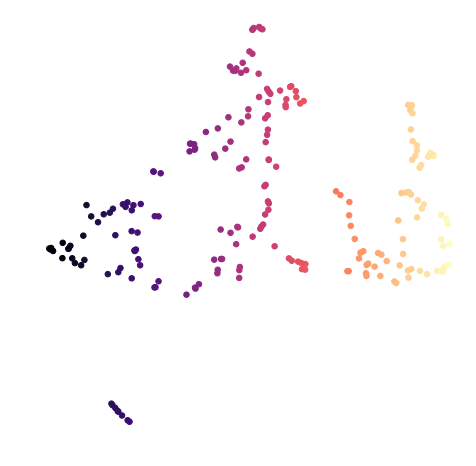

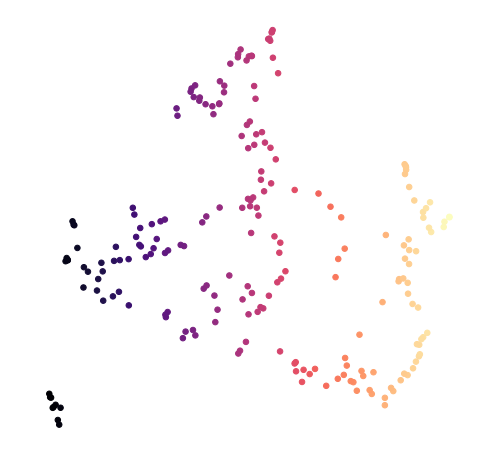

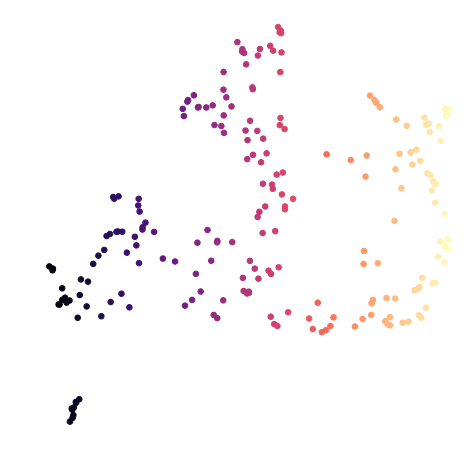

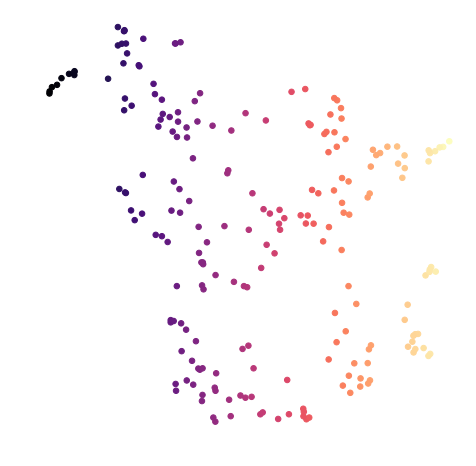

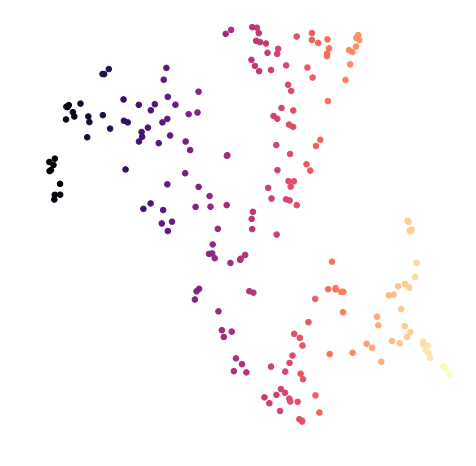

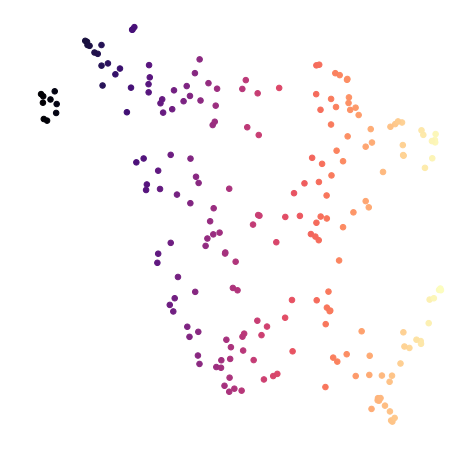

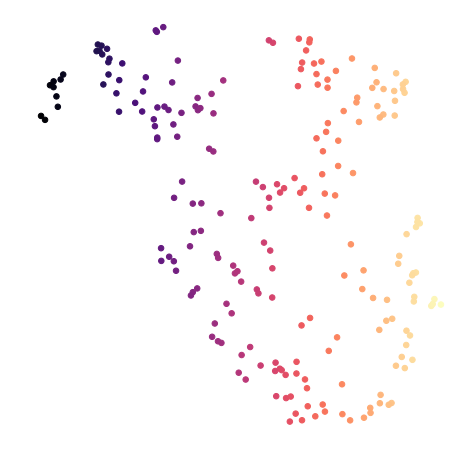

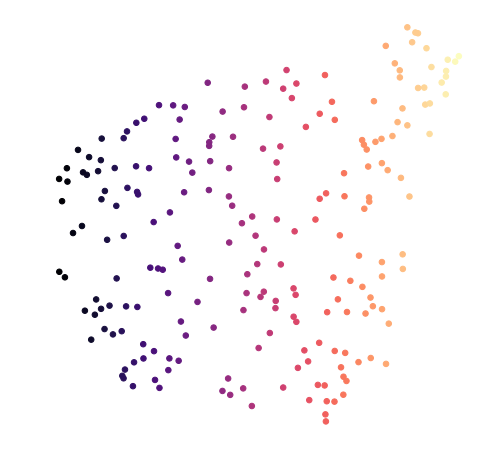

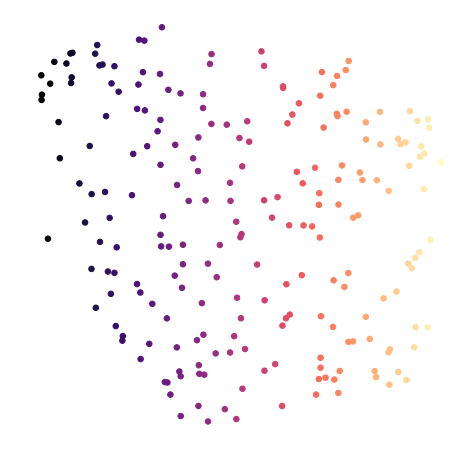

C:\Users\eliza\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 21 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


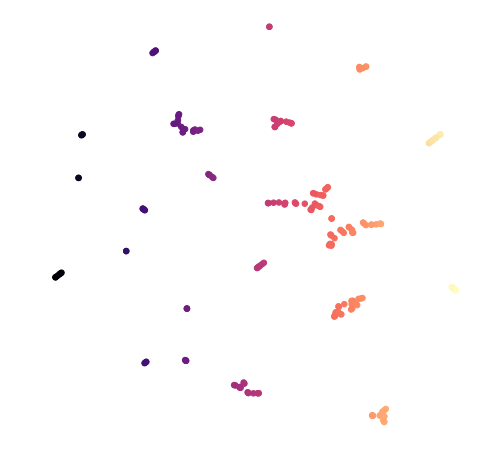

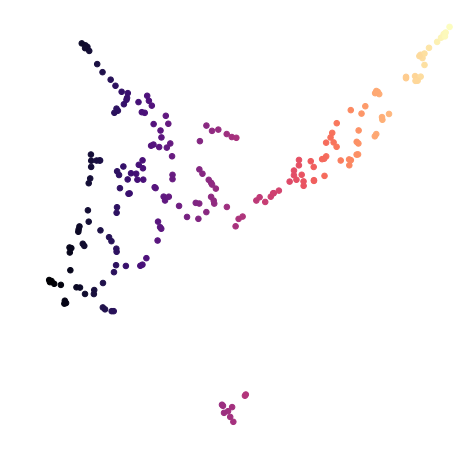

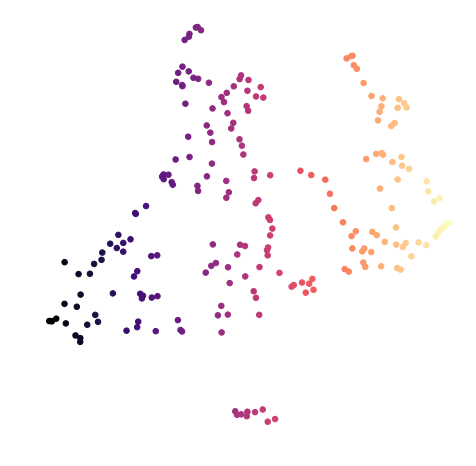

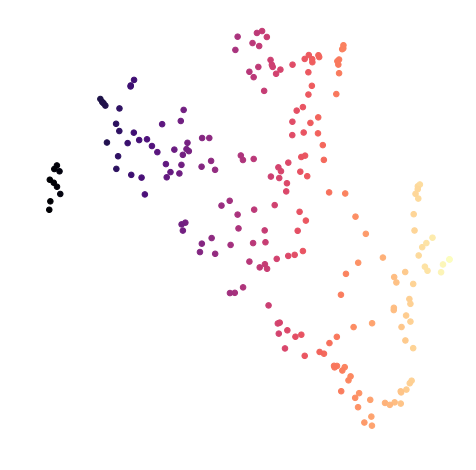

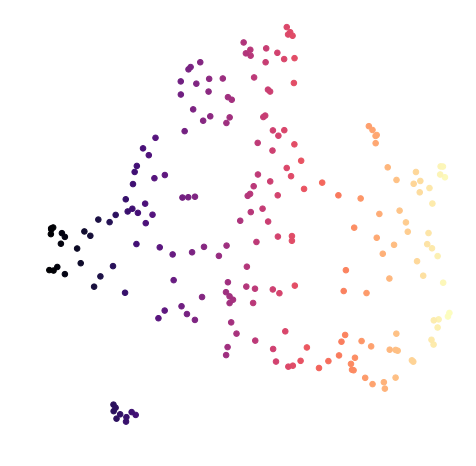

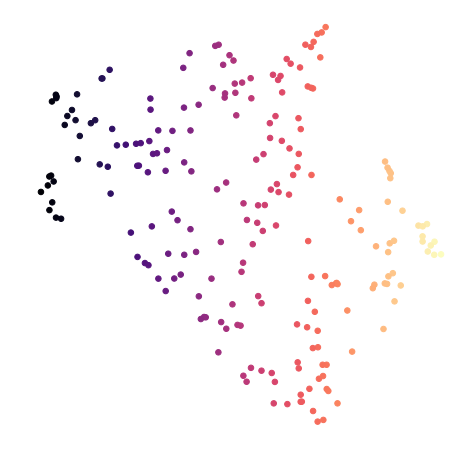

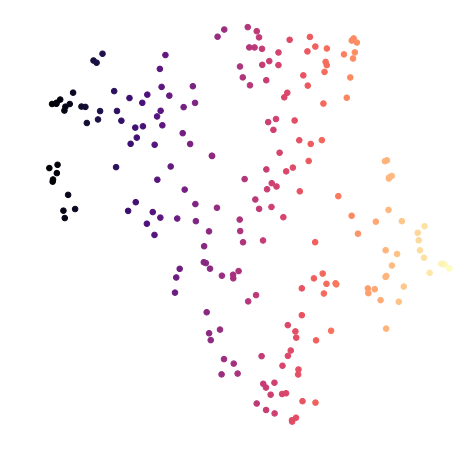

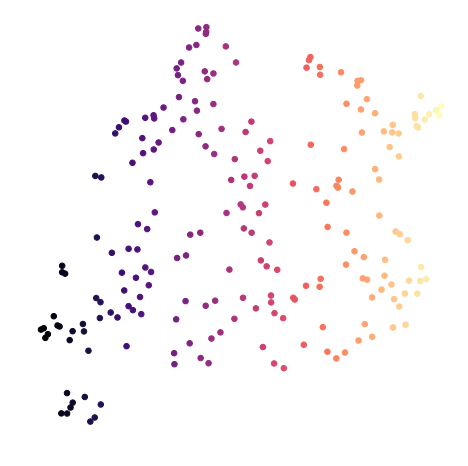

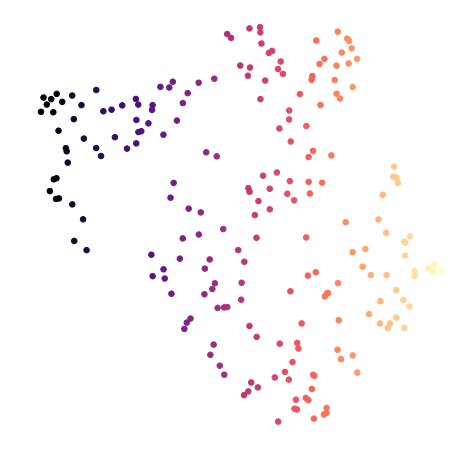

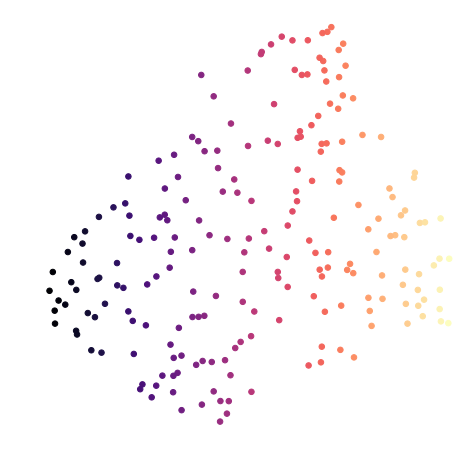

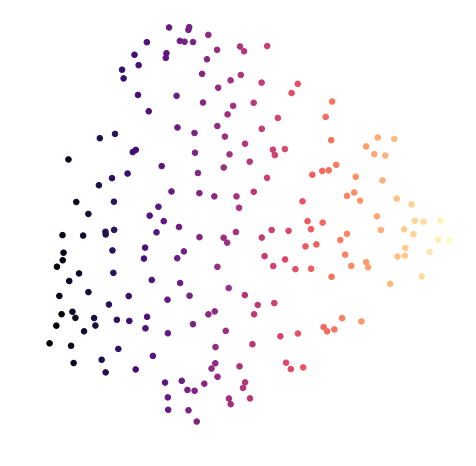

C:\Users\eliza\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 21 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


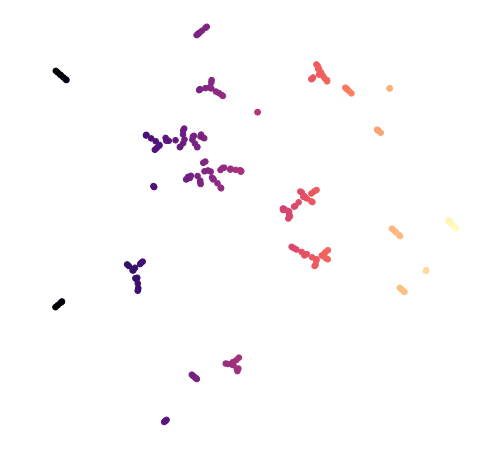

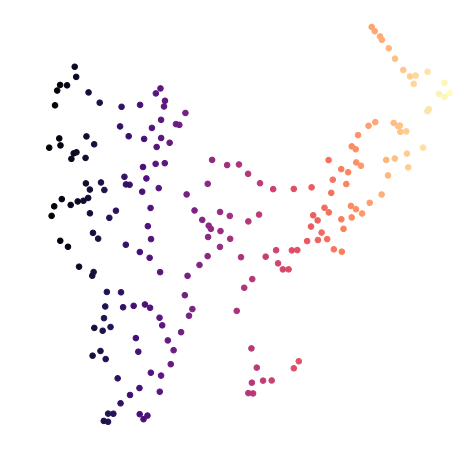

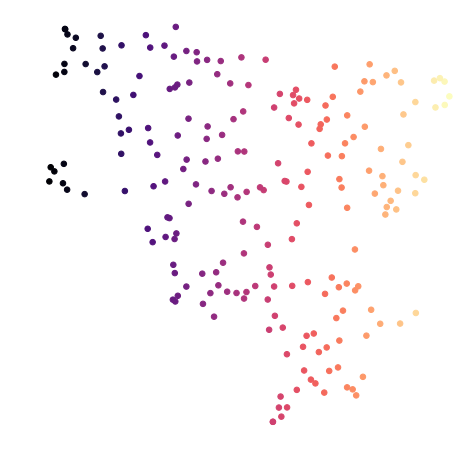

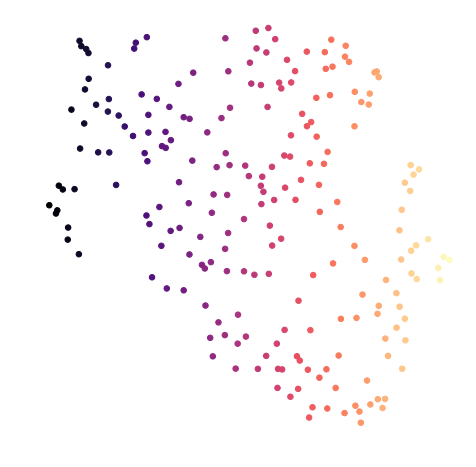

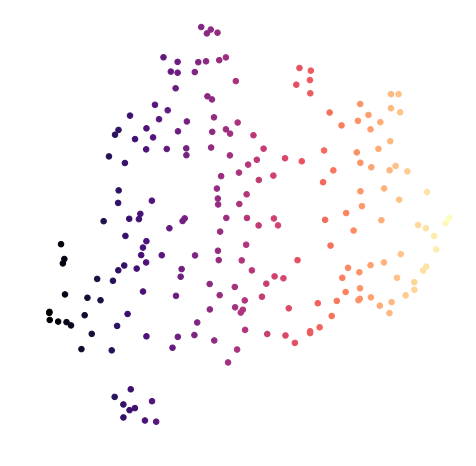

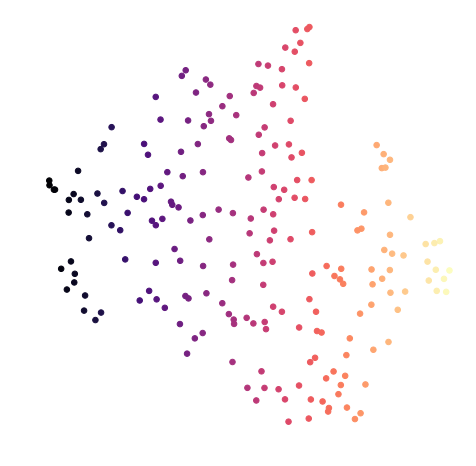

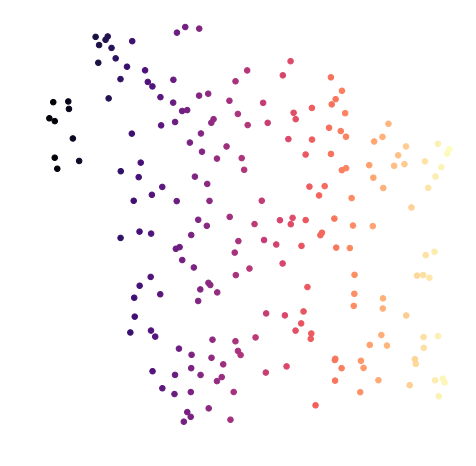

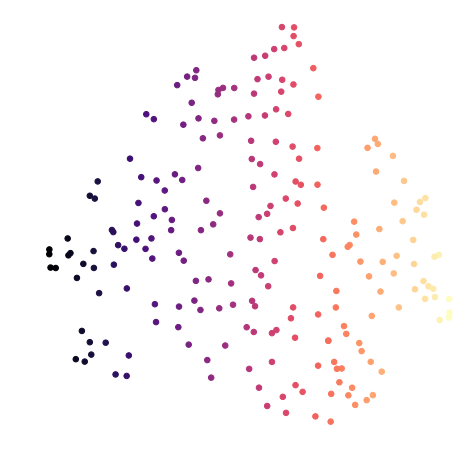

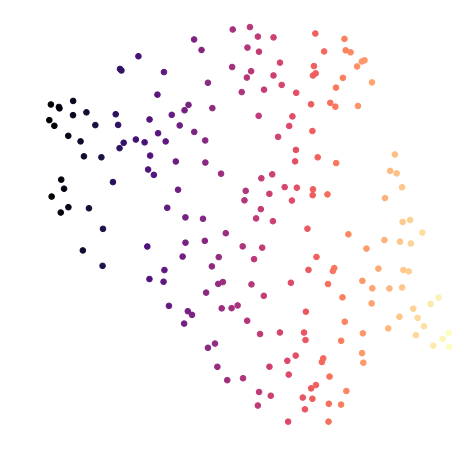

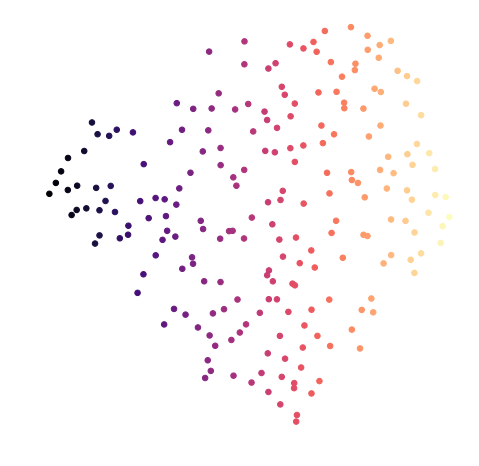

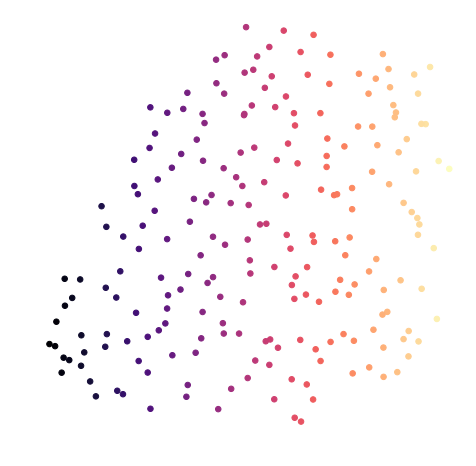

C:\Users\eliza\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 21 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


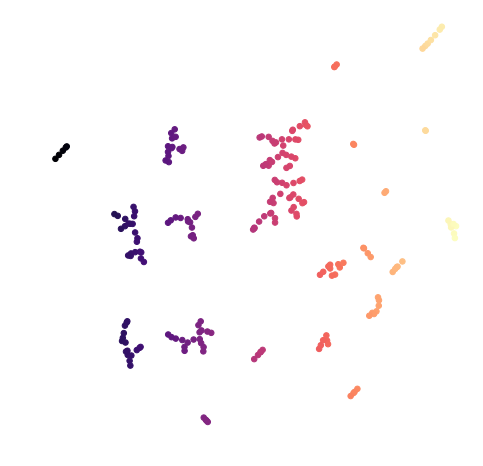

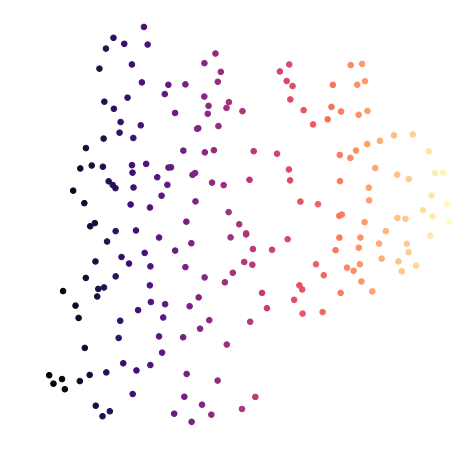

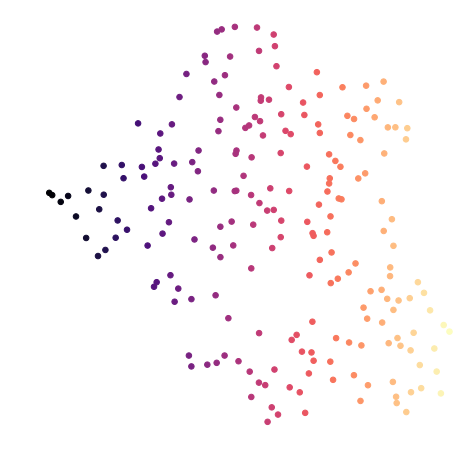

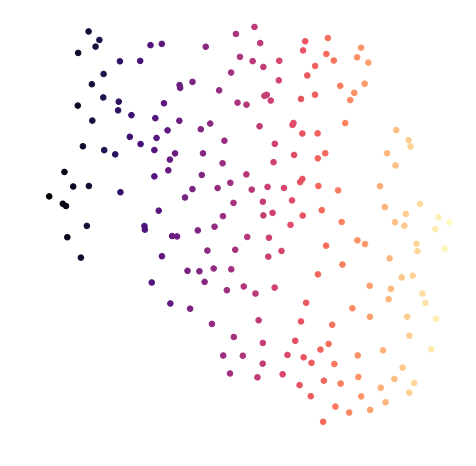

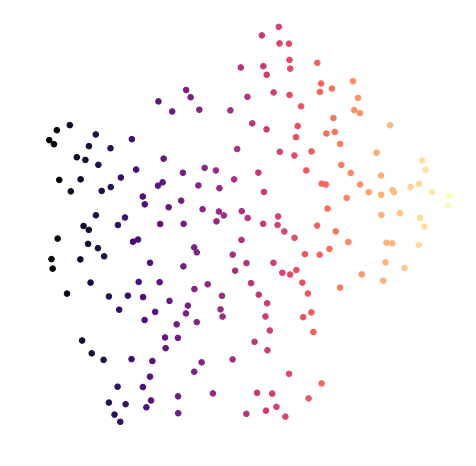

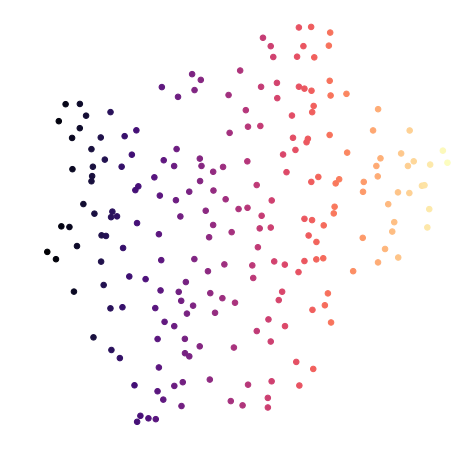

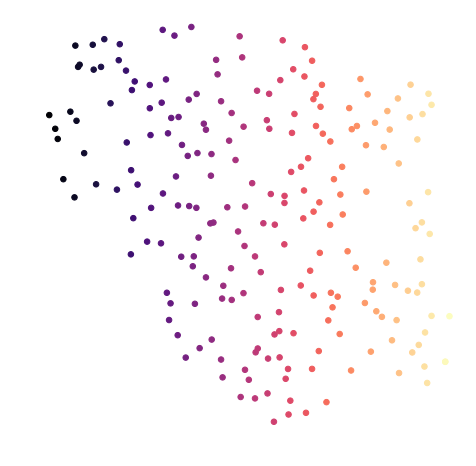

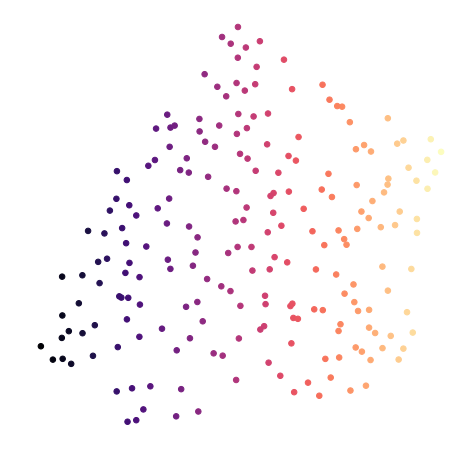

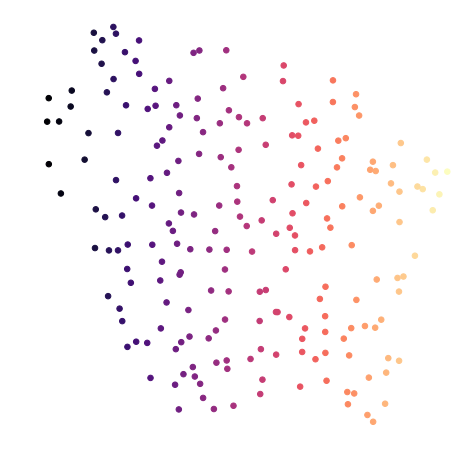

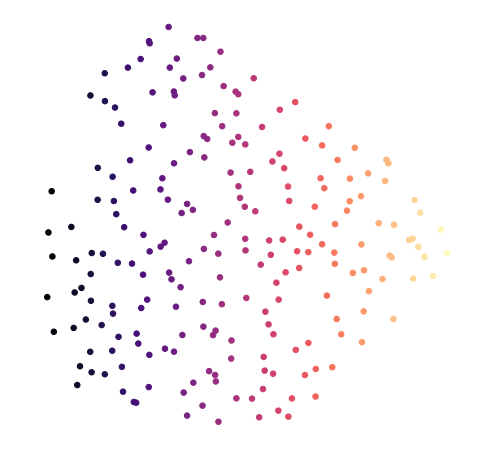

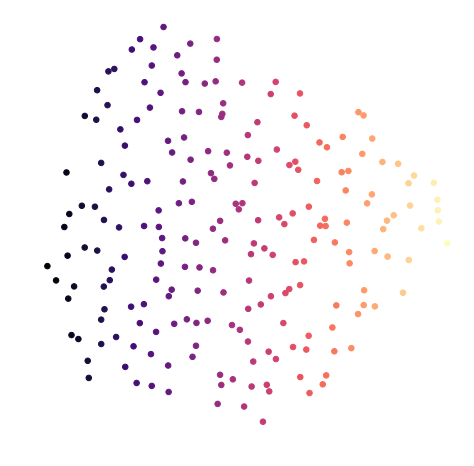

C:\Users\eliza\Anaconda3\lib\site-packages\umap\spectral.py:229: UserWarning: Embedding a total of 21 separate connected components using meta-embedding (experimental)
  n_components
C:\Users\eliza\Anaconda3\lib\site-packages\sklearn\manifold\spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


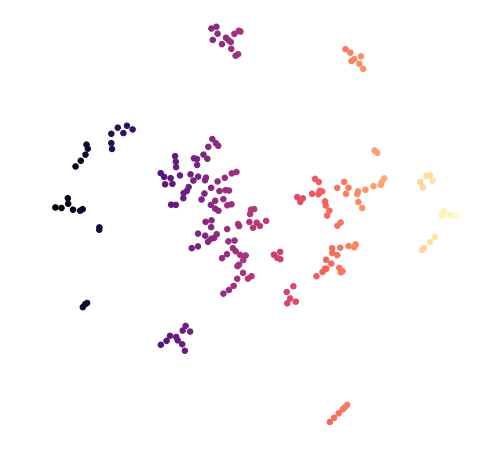

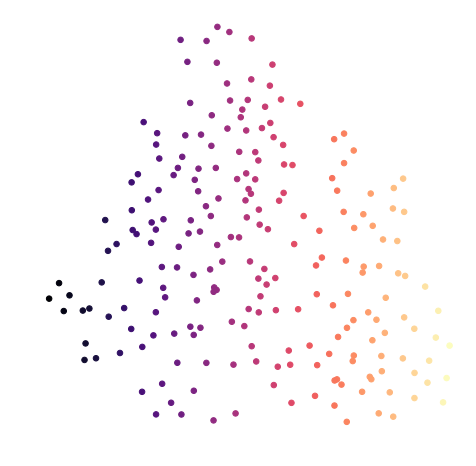

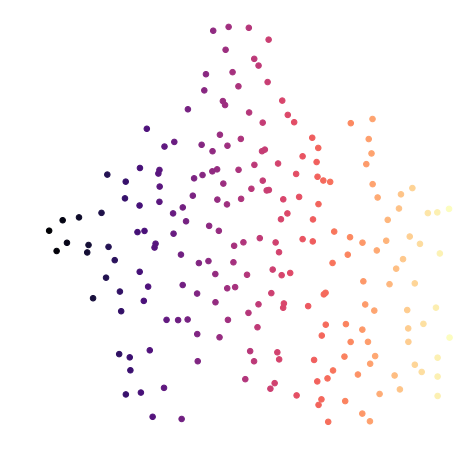

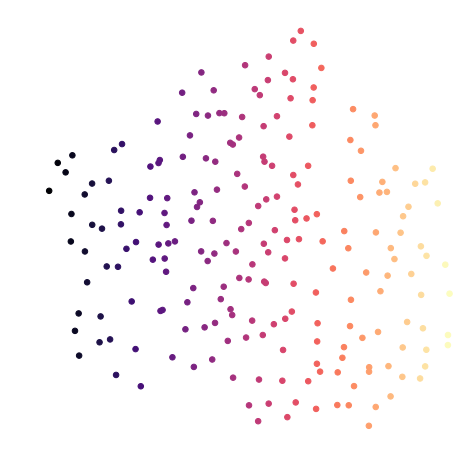

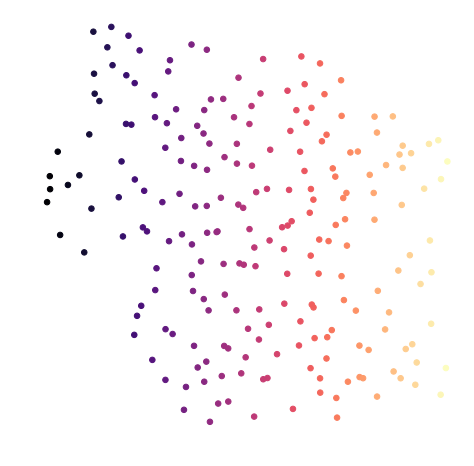

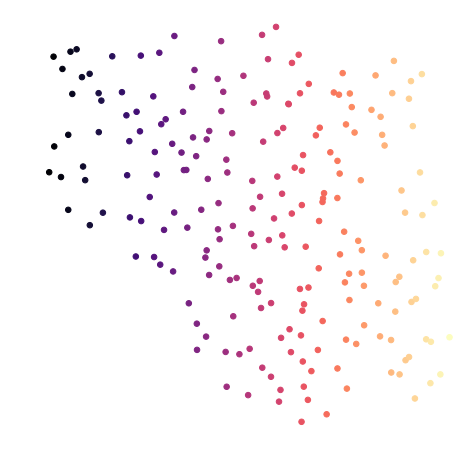

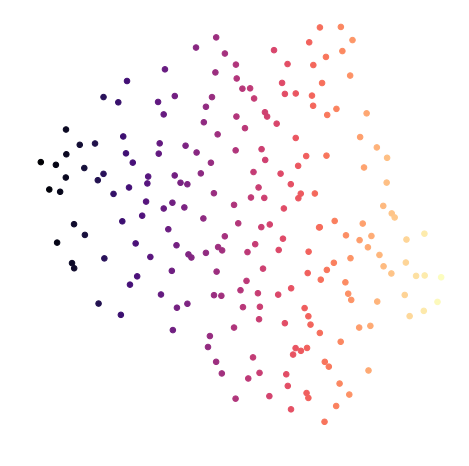

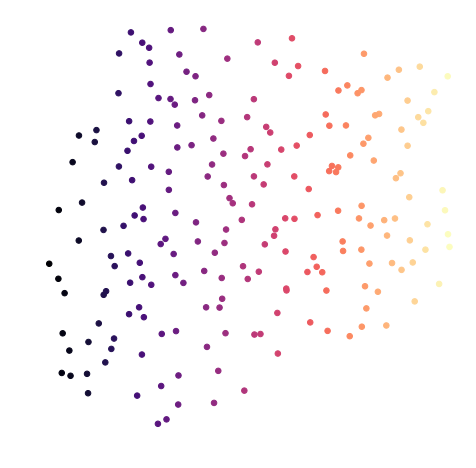

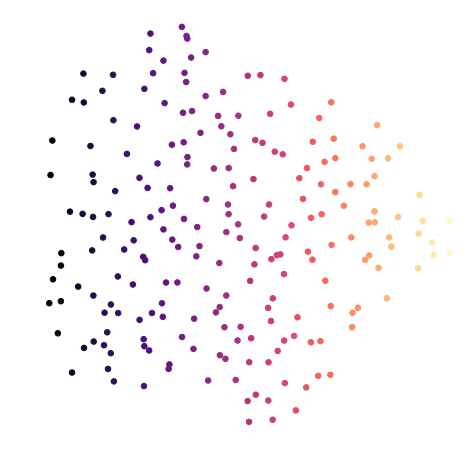

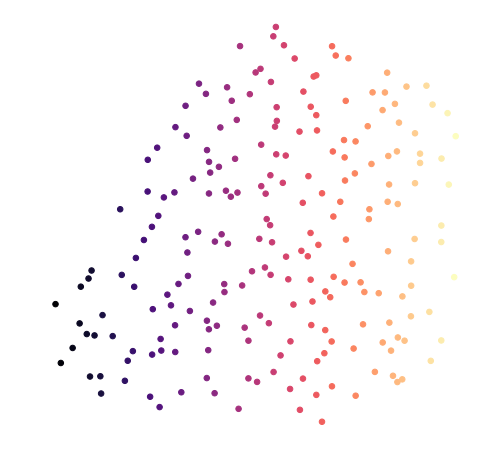

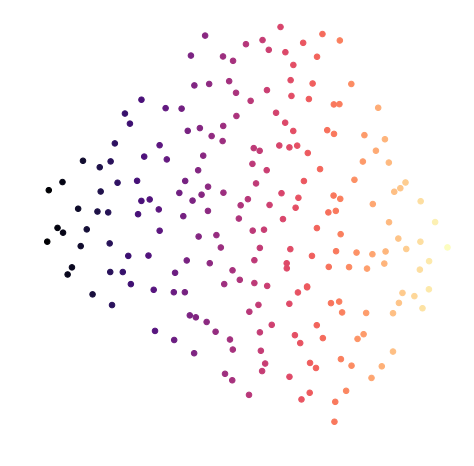

In [6]:
for i in range(len(mindists)): # ну все понятно
    for j in range(len(neighs)):
        embedding = umap.UMAP(min_dist=mindists[i], n_neighbors=neighs[j], random_state=1).fit_transform(new_data)
        plt.figure(figsize=(7.9,8))
        plt.scatter(*embedding.T, s=30, c=embedding[:, 0], cmap='magma')
        plt.axis('off')
        plt.show()

### Снижение размерности

In [7]:
emb = umap.UMAP(min_dist=0.01, n_neighbors=3, random_state=1).fit_transform(new_data)

### Создание датасета с обработанными данными

In [8]:
spisok = dict()
i = 0
for j in names:
    spisok['{}'.format(j)] = emb[i]
    i += 1
ndata = pd.DataFrame(spisok).T
ndata.head()

,0,1
2GIVE,-0.912867,2.703120
808Coin,-5.564603,-2.068789
Advanced Technology Coin,-2.286654,-0.330702
Adzcoin,-2.737030,-0.671715
Aeon,-1.095758,2.194502


### Поиск рядов из кластера №1

In [9]:
vecs = ndata[(ndata[0] < -3) & (ndata[0] > -4) & (ndata[1] > 4)]
cos = vecs.index
vecs

,0,1
AnarchistsPrime,-3.634372,4.327689
Einsteinium,-3.592811,4.300900
GoldBlocks,-3.676093,4.187680
MonaCoin,-3.540370,4.376472
TransferCoin,-3.403465,4.271804
Vertcoin,-3.416341,4.293633


### Построение графиков временных рядов из кластера №1

Text(0, 0.5, 'Цена (доллары)')

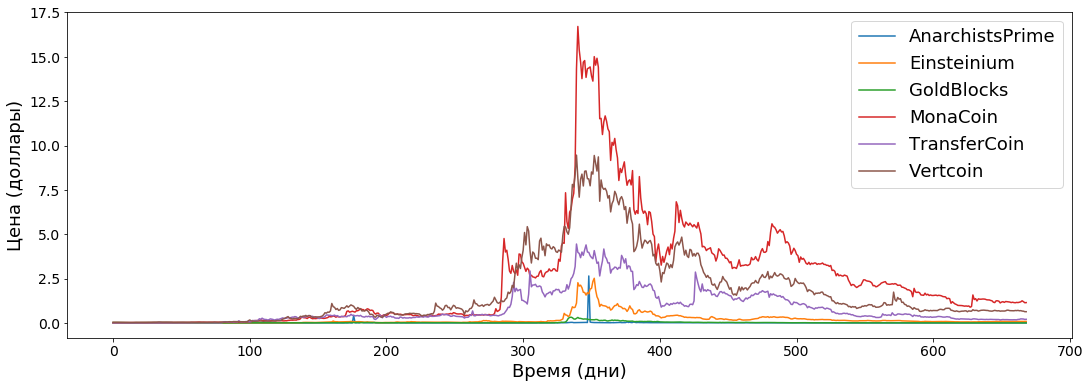

In [10]:
plt.figure(figsize=(18, 6))
for i in cos:
    plt.plot([j for j in range(data.shape[1])], data[data.index == i].T, label=i)
plt.legend(fontsize=18)
plt.xlabel('Время (дни)', fontsize=18)
plt.tick_params(labelsize=14)
plt.ylabel('Цена (доллары)', fontsize=18)

### Построение графиков стандартизированных временных рядов из кластера №1

C:\Users\eliza\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


[]

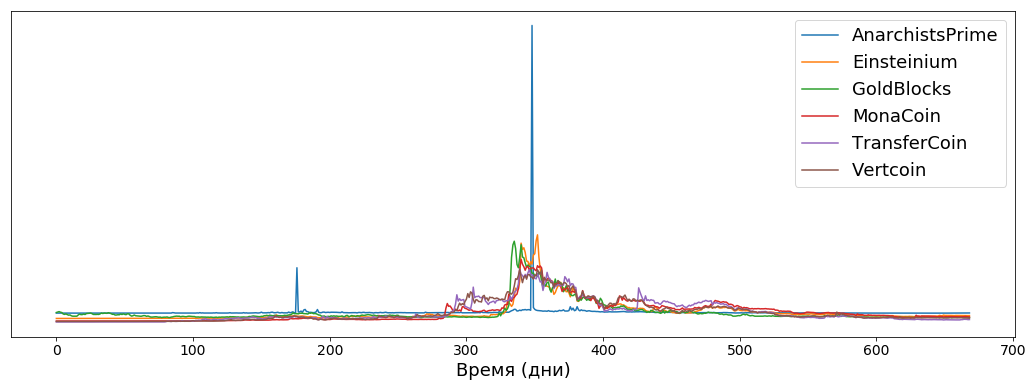

In [11]:
plt.figure(figsize=(18, 6))
for i in cos:
    plt.plot([j for j in range(new_data.shape[1])], new_data[new_data.index == i].T, label=i)
plt.legend(fontsize=18)
plt.xlabel('Время (дни)', fontsize=18)
plt.tick_params(labelsize=14)
plt.axes().get_yaxis().set_ticks([])

### Выделение криптовалют кластера №1 из исходных данных

In [12]:
claster_1 = data.loc[('AnarchistsPrime', 'Einsteinium', 'GoldBlocks', 'MonaCoin', 'TransferCoin', 'Vertcoin'), data.columns]
claster_1

,0,1,2,3,4,5,6,7,8,9,...,659,660,661,662,663,664,665,666,667,668
AnarchistsPrime,0.001083,0.001001,0.001078,0.001054,0.001085,0.001012,0.000869,0.000885,0.000929,0.000896,...,0.001037,0.001678,0.001739,0.001750,0.001737,0.001740,0.001749,0.001742,0.002084,0.002084
Einsteinium,0.001098,0.001127,0.001052,0.001013,0.000970,0.000913,0.000885,0.000872,0.000857,0.000875,...,0.090160,0.091832,0.088112,0.087833,0.085651,0.084277,0.084701,0.085525,0.086878,0.087563
GoldBlocks,0.026922,0.028855,0.030697,0.028244,0.026783,0.020570,0.019014,0.020857,0.018021,0.015709,...,0.005923,0.006873,0.007470,0.007777,0.005909,0.005018,0.005965,0.007740,0.007312,0.005648
MonaCoin,0.023904,0.023527,0.023289,0.024137,0.025844,0.024651,0.023480,0.023612,0.023349,0.023822,...,1.150000,1.140000,1.160000,1.150000,1.170000,1.190000,1.250000,1.200000,1.140000,1.150000
TransferCoin,0.004384,0.005138,0.005612,0.004632,0.005441,0.004804,0.004204,0.004649,0.004583,0.004594,...,0.182571,0.177642,0.177916,0.200330,0.203096,0.231291,0.227935,0.223500,0.200955,0.208473
Vertcoin,0.034910,0.034245,0.036945,0.037333,0.038174,0.034006,0.030574,0.029557,0.029557,0.029699,...,0.687475,0.703659,0.697194,0.710219,0.688266,0.696528,0.672538,0.665377,0.636807,0.636222


### Расчет корреляции между рядами внутри кластера №1

In [13]:
corr1 = np.array(claster_1.T.corr())

### Создание heatmap для корреляции

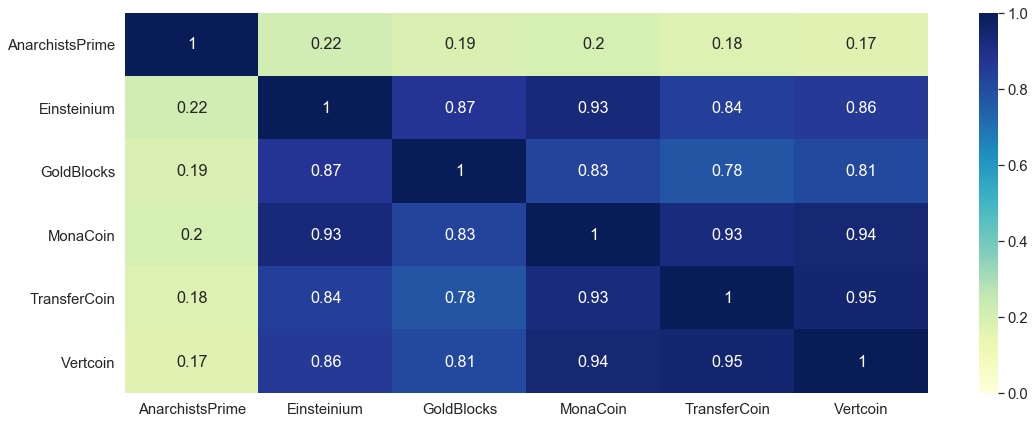

In [14]:
plt.figure(figsize = (18,7))
sns.set(font_scale=1.35)
sns.heatmap(corr1, vmin=0,
            xticklabels=claster_1.index,
            yticklabels=claster_1.index, annot=True, cmap='YlGnBu')

### Расчет корреляции между рядом AnarchistsPrime и остальными

In [15]:
corr_an = data.T.drop(labels='AnarchistsPrime', axis=1).corrwith(data.T['AnarchistsPrime'])

### График с коэффициентами корреляции между рядом AnarchistsPrime и остальными

Text(0, 0.5, 'Коэффициент корреляции')

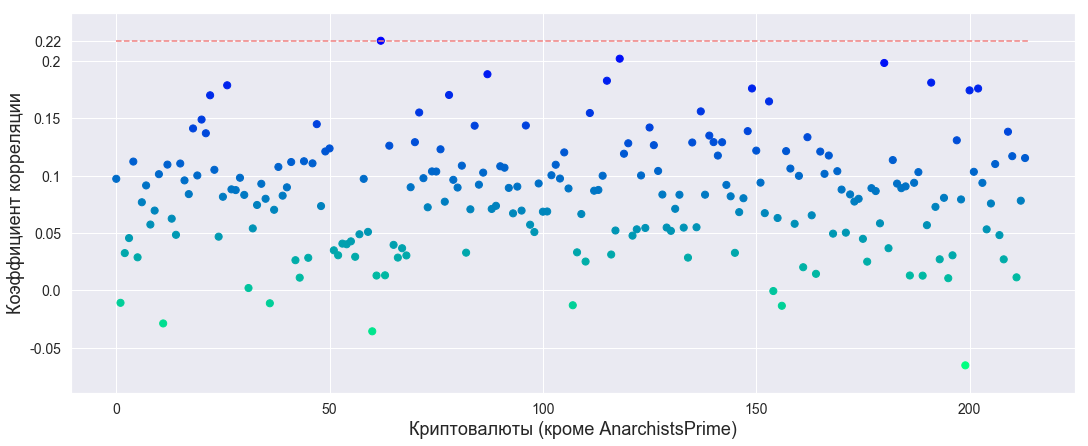

In [16]:
plt.figure(figsize=(18, 7))
plt.scatter([j for j in range(new_data.shape[0]-1)], corr_an.T, s=50, c=-corr_an.values, cmap='winter')
plt.hlines(y=np.max(corr_an), xmin=0, xmax=214, color=[240/255, 128/255, 128/255], linestyles="--")
plt.yticks([-0.05, 0.00, 0.05, 0.10, 0.15, 0.20, np.max(corr_an)], [-0.05, 0.00, 0.05, 0.10, 0.15, 0.20, round(np.max(corr_an), 2)])
plt.tick_params(labelsize=14)
plt.xlabel('Криптовалюты (кроме AnarchistsPrime)', fontsize=18)
plt.ylabel('Коэффициент корреляции', fontsize=18)

### Поиск рядов из кластера №2

In [17]:
nvecs = ndata[(ndata[0] > 4.5) & (ndata[0] < 5.4) & (ndata[1] > 1.1) & (ndata[1] > 1.4)]
ncos = nvecs.index
nvecs

,0,1
Augur,4.795122,1.738811
Bullion,4.841654,1.770832
Decred,4.903148,1.795807
Ethereum,4.790346,1.734510
Unobtanium,4.879013,1.780473


### Построение графиков временных рядов из кластера №2

Text(0, 0.5, 'Цена (доллары)')

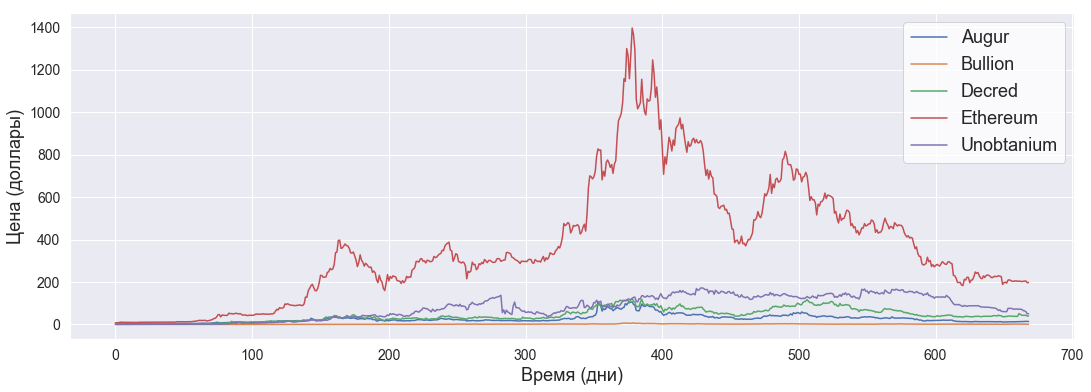

In [18]:
plt.figure(figsize=(18, 6))
for i in ncos:
    plt.plot([j for j in range(data.shape[1])], data[data.index == i].T, label=i)
plt.legend(fontsize=18, facecolor='w')
plt.tick_params(labelsize=14)
plt.xlabel('Время (дни)', fontsize=18)
plt.ylabel('Цена (доллары)', fontsize=18)

### Построение графиков стандартизированных временных рядов из кластера №1

C:\Users\eliza\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


[]

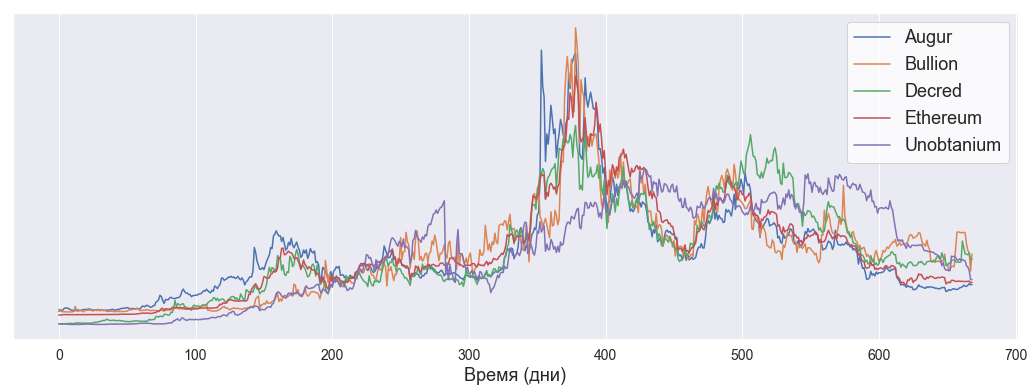

In [19]:
plt.figure(figsize=(18, 6))
for i in ncos:
    plt.plot([j for j in range(new_data.shape[1])], new_data[new_data.index == i].T, label=i)
plt.legend(fontsize=18, facecolor='w')
plt.tick_params(labelsize=14)
plt.xlabel('Время (дни)', fontsize=18)
plt.axes().get_yaxis().set_ticks([])

### Выделение криптовалют кластера №2 из исходных данных

In [20]:
claster_2 = data.loc[('Augur', 'Bullion', 'Decred', 'Ethereum', 'Unobtanium'), data.columns]
claster_2

,0,1,2,3,4,5,6,7,8,9,...,659,660,661,662,663,664,665,666,667,668
Augur,3.750000,3.990000,4.170000,4.290000,4.920000,5.060000,5.130000,4.690000,4.620000,4.220000,...,13.08,13.19,13.50,14.12,13.68,13.65,14.06,14.78,14.24,14.43
Bullion,0.106536,0.108220,0.055856,0.051186,0.052623,0.048835,0.044244,0.046331,0.046350,0.046803,...,2.06,2.05,2.05,2.06,2.05,1.77,1.60,1.54,1.08,1.51
Decred,0.483748,0.490269,0.472265,0.461302,0.626407,0.553009,0.554099,0.672879,0.819151,0.829091,...,38.25,38.62,51.38,47.31,43.47,43.35,42.92,44.10,39.93,40.08
Ethereum,7.980000,8.170000,8.370000,9.710000,11.290000,10.290000,10.240000,9.870000,10.310000,10.370000,...,205.17,204.02,204.13,203.87,202.34,203.36,204.51,205.17,197.20,197.65
Unobtanium,1.640000,1.690000,1.630000,1.640000,1.730000,1.410000,1.270000,1.140000,1.110000,1.110000,...,73.32,71.75,72.69,71.51,71.24,65.74,64.34,60.42,50.78,50.32


### Расчет корреляции между рядами внутри кластера №1

In [21]:
corr2 = np.array(claster_2.T.corr())

### Создание heatmap для корреляции

(array([0.5, 1.5, 2.5, 3.5, 4.5]), <a list of 5 Text yticklabel objects>)

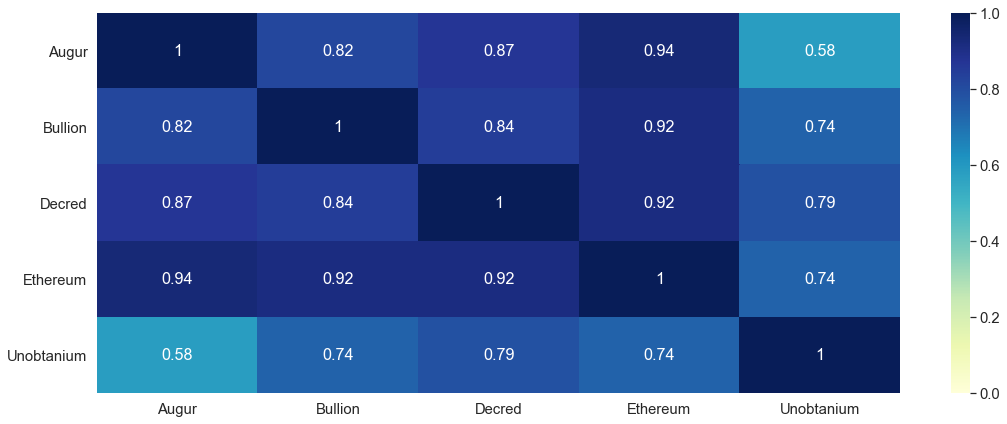

In [22]:
plt.figure(figsize = (18,7))
sns.set(font_scale=1.35)
sns.heatmap(corr2, vmin=0,
            xticklabels=claster_2.index,
            yticklabels=claster_2.index, annot=True, cmap='YlGnBu')
plt.yticks(rotation=0)

### Расчет корреляции между всеми рядами

In [23]:
all_corr = np.array(data.T.corr())

### Создание списка с расстояниями между объектами

In [24]:
dist = cdist(emb, emb)
prop = []
for i in range(214):
    for j in range(i+1, 215):
        prop.append(dist[i, j])

### Создание списка с коэффициентами корреляции между объектами

In [25]:
prom = []
for i in range(214):
    for j in range(i+1, 215):
        prom.append(all_corr[i, j])

### Построение графика зависимости корреляции и расстояний UMAP + линия тренда

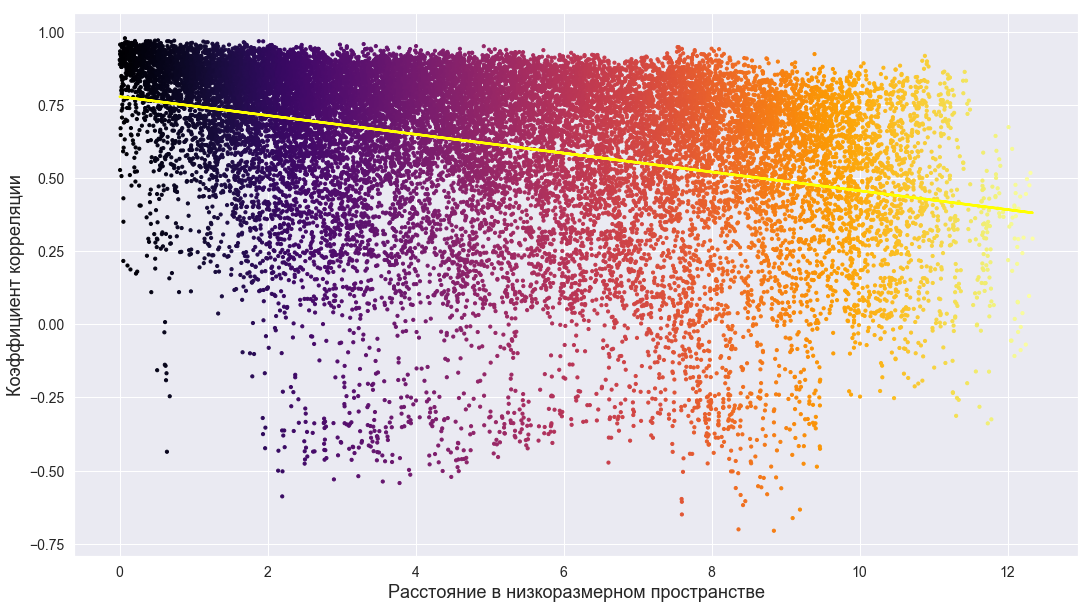

In [26]:
plt.figure(figsize=(18, 10))
plt.xlabel('Расстояние в низкоразмерном пространстве', fontsize=18)
plt.ylabel('Коэффициент корреляции', fontsize=18)
plt.scatter(prop, prom, s=10, c=prop, cmap='inferno')
plt.tick_params(labelsize=14)
z = np.polyfit(prop, prom, 1)
p = np.poly1d(z)
plt.plot(prop, p(prop), c='yellow', linewidth=2.5)

### Поиск объектов с наименьшим коэффициентом корреляции

In [27]:
for i in range(all_corr.shape[0]):
    for j in range(all_corr.shape[1]):
        if all_corr[i][j] == -np.max(-all_corr):
            diff = [i, j]

### Значение наименьшего коэффициента корреляции

In [28]:
corr_diff = np.array(data.T[[data.index[diff[0]], data.index[diff[1]]]].corr()) # считаю странную корреляцию
corr_diff

array([[ 1.        , -0.70618108],
       [-0.70618108,  1.        ]])

### Поиск объектов с наименьшим коэффициентом корреляции

C:\Users\eliza\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
C:\Users\eliza\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


[]

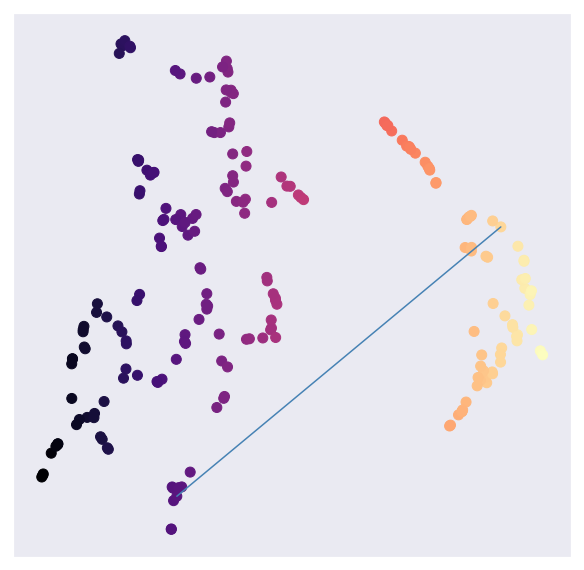

In [29]:
plt.figure(figsize=(10,10))
plt.plot([-2.274, 5.62], [-2.353, 1.625], c=[70/255, 130/255, 180/255])
plt.scatter(*emb.T, s=100, c=emb[:, 0], cmap='magma')
plt.axes().get_xaxis().set_ticks([])
plt.axes().get_yaxis().set_ticks([])